In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns

In [12]:
df=pd.read_csv("globalterrordata.csv",engine="python")
df
df.shape

(181691, 140)

In [14]:
india_df=df[df['country_txt']=='India']
india_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
1186,197202220004,1972,2,22,NaN,0,NaN,92,India,6,...,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2764,197501190004,1975,1,2,NaN,0,NaN,92,India,6,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3857,197605260001,1976,5,26,NaN,0,NaN,92,India,6,...,-9,-9,0,-9,NaN,NaN,NaN,NaN,NaN,NaN
5327,197709280004,1977,9,28,NaN,0,NaN,92,India,6,...,Hijacking DB,1,1,1,1,NaN,NaN,NaN,NaN,NaN
7337,197901130004,1979,1,13,NaN,0,NaN,92,India,6,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
india_df.shape

(11960, 140)

In [16]:
india_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related', 'Unnamed: 135',
       'Unnamed: 136', 'Unnamed: 137', 'Unnamed: 138', 'Unnamed: 139'],
      dtype='object', length=140)

In [19]:
india_df=india_df[['eventid','iyear', 'imonth', 'country_txt', 'region_txt', 'provstate', 'city', 'latitude', 'longitude','vicinity', 'success','suicide', 'attacktype1_txt', 'targtype1_txt',  'gname','nperps', 'weaptype1_txt',  'nkill', 'nwound']]

In [20]:
india_df.shape


(11960, 19)

In [21]:
india_df.columns

Index(['eventid', 'iyear', 'imonth', 'country_txt', 'region_txt', 'provstate',
       'city', 'latitude', 'longitude', 'vicinity', 'success', 'suicide',
       'attacktype1_txt', 'targtype1_txt', 'gname', 'nperps', 'weaptype1_txt',
       'nkill', 'nwound'],
      dtype='object')

In [22]:
india_df.rename(columns={'imonth': 'Month',
 'iyear': 'Year',
 'eventid': 'Event ID',
 'provstate': 'State',
 'city': 'City',
   'country_txt':'Country',
    'region_txt':'Region',                    
  'latitude':'Latitude',
    'longitude':'Longitude',
  'vicinity':'Vicinity',
  'success':'Sucess',
  'suicide':'Suicide',
 'attacktype1_txt': 'Attack type',
 'targtype1_txt': 'Target',
 'gname': 'Terrorist Group',
  'nperps':'No of terrorists',
 'weaptype1_txt': 'Weapon type',
 'weapsubtype1_txt': 'Weapon subtype',
 'nkill': 'Killed',
 'nwound': 'Wounded'},inplace=True)
india_df.columns

Index(['Event ID', 'Year', 'Month', 'Country', 'Region', 'State', 'City',
       'Latitude', 'Longitude', 'Vicinity', 'Sucess', 'Suicide', 'Attack type',
       'Target', 'Terrorist Group', 'No of terrorists', 'Weapon type',
       'Killed', 'Wounded'],
      dtype='object')

In [23]:
india_df.head()

,Event ID,Year,Month,Country,Region,State,City,Latitude,Longitude,Vicinity,Sucess,Suicide,Attack type,Target,Terrorist Group,No of terrorists,Weapon type,Killed,Wounded
1186,197202220004,1972,2,India,South Asia,Delhi,New Delhi,28.585836,77.153336,0,1,0,Hijacking,Airports & Aircraft,Palestinians,5.0,Explosives,0,0
2764,197501190004,1975,1,India,South Asia,Bihar,Samastipur,25.863042,85.781004,0,1,0,Bombing/Explosion,Government (General),Ananda Marga,-99.0,Explosives,4,0
3857,197605260001,1976,5,India,South Asia,Delhi,New Delhi,28.585836,77.153336,0,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,NaN,Explosives,0,0
5327,197709280004,1977,9,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,0,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),5.0,Firearms,Grenades,0
7337,197901130004,1979,1,India,South Asia,Assam,Unknown,26.200605,92.937574,0,1,0,Armed Assault,Police,Naga People,NaN,Firearms,NaN,NaN


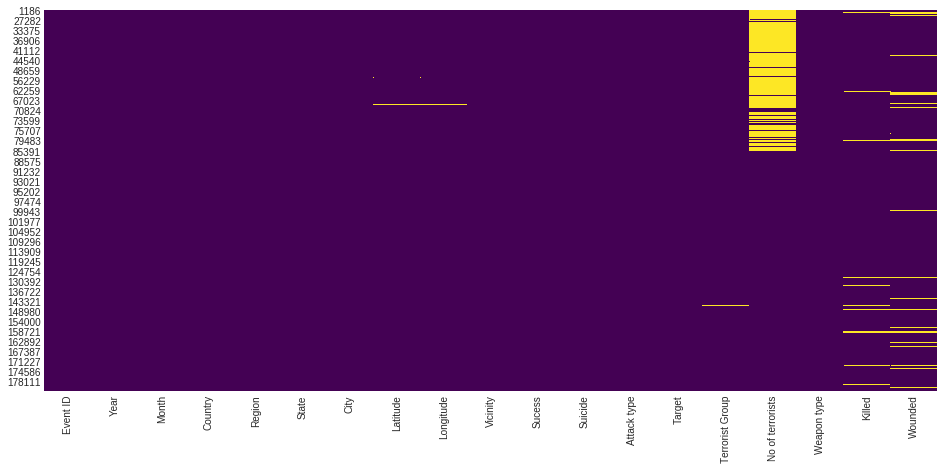

In [24]:
plt.figure(figsize=(16,7))
sns.heatmap(india_df.isnull(),cmap='viridis',cbar=False)

In [25]:
india_df['Latitude'].fillna(0,inplace = True)
india_df['Longitude'].fillna(0,inplace = True)
india_df['No of terrorists'].fillna(0, inplace = True)
india_df['Killed'].fillna(0, inplace = True)
india_df['Wounded'].fillna(0, inplace = True)
india_df['Weapon type'].fillna('Unknown', inplace = True)
india_df.dropna(inplace = True)

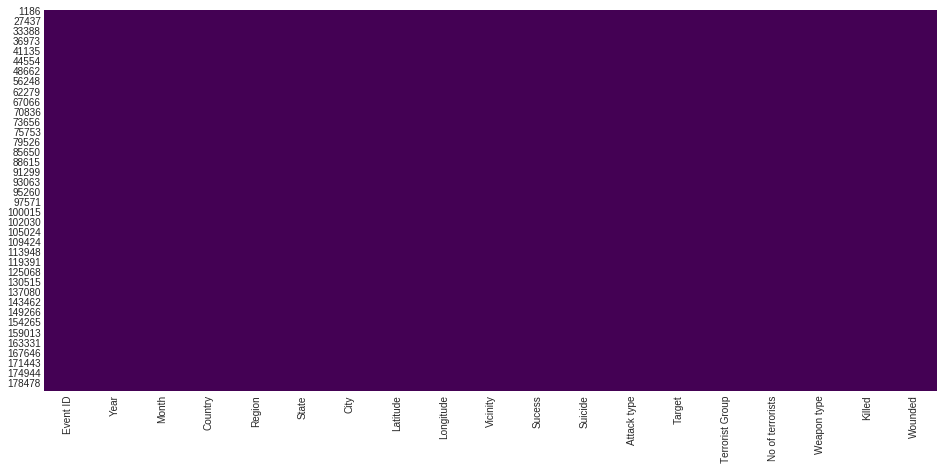

In [52]:
plt.figure(figsize=(16,7))
sns.heatmap(india_df.isnull(),cmap='viridis',cbar=False)

In [26]:
india_df.head()

,Event ID,Year,Month,Country,Region,State,City,Latitude,Longitude,Vicinity,Sucess,Suicide,Attack type,Target,Terrorist Group,No of terrorists,Weapon type,Killed,Wounded
1186,197202220004,1972,2,India,South Asia,Delhi,New Delhi,28.585836,77.153336,0,1,0,Hijacking,Airports & Aircraft,Palestinians,5.0,Explosives,0,0
2764,197501190004,1975,1,India,South Asia,Bihar,Samastipur,25.863042,85.781004,0,1,0,Bombing/Explosion,Government (General),Ananda Marga,-99.0,Explosives,4,0
3857,197605260001,1976,5,India,South Asia,Delhi,New Delhi,28.585836,77.153336,0,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,0.0,Explosives,0,0
5327,197709280004,1977,9,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,0,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),5.0,Firearms,Grenades,0
7337,197901130004,1979,1,India,South Asia,Assam,Unknown,26.200605,92.937574,0,1,0,Armed Assault,Police,Naga People,0.0,Firearms,0,0


In [27]:
india_df=india_df.drop(['Country','Region','Event ID','Longitude','Latitude'],axis=1)
india_df.shape



(11937, 14)

In [28]:
india_df = india_df.convert_objects(convert_numeric=True)
india_df=india_df.dropna()
india_df=india_df.dropna(axis='columns')
print(india_df.isnull().values.any())
india_df.shape

False


/home/priyal/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


(8, 14)

In [41]:
#reading dataset from our final preprocessed and modified data after removing all noisy data like special characters,null values,etc
india_df=pd.read_csv('finaldata.csv',encoding='utf-8')
print(india_df.shape)
X = india_df.drop('Terrorist Group',axis=1).values
y = india_df['Terrorist Group']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(4499, 14)


In [30]:
X = india_df.drop('Terrorist Group',axis=1).values
y = india_df['Terrorist Group']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape

(3599, 13)

In [32]:
X_test.shape

(900, 13)

In [33]:
from sklearn.preprocessing import OrdinalEncoder
ce_ord = OrdinalEncoder()
ce_ord=ce_ord.fit_transform(X,y)
ce_ord.shape

(4499, 13)

In [34]:
india_df=pd.DataFrame(data=ce_ord)
india_df


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,5.0,1035.0,0.0,1.0,0.0,4.0,0.0,6.0,2.0,30.0,0.0
1,1.0,0.0,2.0,1236.0,0.0,1.0,0.0,2.0,4.0,0.0,2.0,64.0,0.0
2,2.0,4.0,5.0,1035.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,30.0,0.0
3,3.0,8.0,15.0,199.0,0.0,1.0,0.0,4.0,0.0,6.0,4.0,12.0,0.0
4,4.0,0.0,1.0,1474.0,0.0,1.0,0.0,0.0,10.0,1.0,4.0,30.0,0.0
5,4.0,0.0,16.0,559.0,0.0,1.0,0.0,1.0,4.0,1.0,4.0,54.0,0.0
6,4.0,3.0,16.0,1474.0,0.0,1.0,0.0,0.0,10.0,4.0,4.0,64.0,0.0
7,4.0,5.0,18.0,1474.0,0.0,1.0,0.0,1.0,4.0,1.0,4.0,31.0,0.0
8,4.0,6.0,1.0,1474.0,0.0,1.0,0.0,0.0,4.0,1.0,4.0,43.0,2.0
9,4.0,6.0,18.0,13.0,0.0,1.0,0.0,3.0,10.0,1.0,9.0,30.0,0.0


In [35]:
X=india_df.drop([9],axis=1).values
#X = india_df.drop('Terrorist Group',axis=1).values
y = india_df[9]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report
rc = RidgeClassifier()
rc = rc.fit(X=X_train, y=y_train)
y_pred = rc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8455555555555555


In [36]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=0)
pac = pac.fit(X=X_train, y=y_train)
y_pred = pac.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

/home/priyal/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.8466666666666667
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        34
         1.0       0.85      1.00      0.92       762
         2.0       0.00      0.00      0.00        11
         3.0       0.00      0.00      0.00        27
         4.0       0.00      0.00      0.00         7
         5.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         9
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         5
        11.0       0.00      0.00      0.00         5
        13.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         3
        18.0       0.00      0.00      0.00         5
        19.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         3
        

/home/priyal/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
LSVC = LSVC.fit(X_train, y_train)
y_pred = LSVC.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.2877777777777778


/home/priyal/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X=X_train, y=y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.7566666666666667
              precision    recall  f1-score   support

         0.0       0.43      0.38      0.41        34
         1.0       0.90      0.87      0.88       762
         2.0       0.09      0.09      0.09        11
         3.0       0.11      0.15      0.12        27
         4.0       0.06      0.14      0.09         7
         5.0       0.00      0.00      0.00         7
         6.0       0.10      0.33      0.15         3
         7.0       0.00      0.00      0.00         9
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         5
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         5
        13.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         3
        17.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         5
        

/home/priyal/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/priyal/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.8533333333333334